In [1]:
# IMPORTS"
%matplotlib inline 
from pprint import pprint
from collections import Counter
from collections import defaultdict
import random
import time
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import islice
import queue as q

In [2]:
scenario_2 = 'capture20110811.pcap.netflow.labeled'

def parse_line(split_line):
    src = split_l[3].split(':')
    dst = split_l[5].split(':')

    return {
        'datetime': split_l[0],
        'duration': split_l[1],
        'protocol': split_l[2],
        'src_ip': src[0],
        'src_port': '' if len(src) == 1 else src[1],
        'dst_ip': dst[0],
        'dst_port': '' if len(dst) == 1 else src[1],
        'flags': split_l[6],
        'tos': split_l[7],
        'packets': int(split_l[8]),
        'bytes': int(split_l[9]),
        'flows': split_l[10],
        'label': split_l[11][:-1]
    }

parsed = []
with open('Data/{}'.format(scenario_2)) as f:                                
    next(f) # Skip header
    for idx, l in enumerate(f):
        try:
            split_l = list(filter(None, l.split('\t')))
            parsed.append(parse_line(l))
        except Exception as e:
#             print('ERROR on line {}, raw string {}, splitted as {}'.format(idx, l, split_l))
            try:
#                 print('Attempting to pars with space as dividing character...')
                split_l = list(filter(None, l.split(' ')))
                split_l[0:2] = [' '.join(split_l[0:2])] # Merge date and time again
                parsed.append(parse_line(l))
            except Exception as e:
                print('Final ERROR, skipping line, splitted as {}, error {}'.format(split_l, e))

In [3]:
scenario_data = pd.DataFrame.from_records(parsed)
scenario_data['datetime'] = pd.to_datetime(scenario_data['datetime'])
scenario_data.set_index(['datetime'], inplace=True)
scenario_data

,bytes,dst_ip,dst_port,duration,flags,flows,label,packets,protocol,src_ip,src_port,tos
datetime,,,,,,,,,,,,
2011-08-11 10:10:00.003,135,147.32.84.229,23929,0.967,INT,1,Background,2,UDP,89.31.8.11,23929,0
2011-08-11 10:10:00.003,276,89.31.8.11,13363,0.967,INT,1,Background,2,UDP,147.32.84.229,13363,0
2011-08-11 10:10:00.006,62,147.32.84.229,34042,0.000,INT,1,Background,1,UDP,208.88.186.6,34042,0
2011-08-11 10:10:00.008,78,147.32.84.229,55246,0.000,INT,1,Background,1,UDP,92.118.218.77,55246,0
2011-08-11 10:10:00.009,72,147.32.84.229,10223,0.000,INT,1,Background,1,UDP,182.185.139.181,10223,0
2011-08-11 10:10:00.011,60,92.118.218.77,13363,0.000,INT,1,Background,1,UDP,147.32.84.229,13363,0
2011-08-11 10:10:00.011,60,182.185.139.181,13363,0.000,INT,1,Background,1,UDP,147.32.84.229,13363,0
2011-08-11 10:10:00.013,77,147.32.84.229,6386,0.000,INT,1,Background,1,UDP,86.27.118.198,6386,0
2011-08-11 10:10:00.014,60,86.27.118.198,13363,0.000,INT,1,Background,1,UDP,147.32.84.229,13363,0


In [4]:
host = '147.32.84.229'
scenario_data = scenario_data[scenario_data['src_ip'] == host]
scenario_data

,bytes,dst_ip,dst_port,duration,flags,flows,label,packets,protocol,src_ip,src_port,tos
datetime,,,,,,,,,,,,
2011-08-11 10:10:00.003,276,89.31.8.11,13363,0.967,INT,1,Background,2,UDP,147.32.84.229,13363,0
2011-08-11 10:10:00.011,60,92.118.218.77,13363,0.000,INT,1,Background,1,UDP,147.32.84.229,13363,0
2011-08-11 10:10:00.011,60,182.185.139.181,13363,0.000,INT,1,Background,1,UDP,147.32.84.229,13363,0
2011-08-11 10:10:00.014,60,86.27.118.198,13363,0.000,INT,1,Background,1,UDP,147.32.84.229,13363,0
2011-08-11 10:10:00.023,60,213.246.38.78,13363,0.000,INT,1,Background,1,UDP,147.32.84.229,13363,0
2011-08-11 10:10:00.028,526,194.165.188.87,13363,0.215,INT,1,Background,2,UDP,147.32.84.229,13363,0
2011-08-11 10:10:00.029,60,86.186.242.169,13363,0.000,INT,1,Background,1,UDP,147.32.84.229,13363,0
2011-08-11 10:10:00.038,358,87.20.151.25,13363,1.998,INT,1,Background,2,UDP,147.32.84.229,13363,0
2011-08-11 10:10:00.040,73,1.168.131.80,13363,0.000,INT,1,Background,1,UDP,147.32.84.229,13363,0


### Min-Wise sampling

In [5]:
class MaxWiseSampling:
    """
    Because Priority gives lowest score highes priority, use MaxWise instead of MinWise sampling
    Eventually queue will be filled with score values close to 1
    """
    def __init__(self, maximumSize):
        self.queue = q.PriorityQueue(maxsize=maximumSize)

    def add(self, element):
        score = random.uniform(0, 1)
        if self.queue.full():
            old_smallest_value = self.queue.get()
            if old_smallest_value[0] < score:
                # New element is larger so replace smallest element
                self.queue.put((score, element))
            else:
                # Put back old item
                self.queue.put(old_smallest_value)
        else:
            self.queue.put((score, element))

    def count(self):
        ip_dict = defaultdict(lambda: 0)
        while not self.queue.empty():
            ip_dict[self.queue.get()[1]] += 1
        return ip_dict

In [6]:
mws = MaxWiseSampling(2)
mws.add((1, 'a'))
mws.add((2, 'b'))
mws.add((3, 'c'))
mws.count()

defaultdict(<function __main__.MaxWiseSampling.count.<locals>.<lambda>()>,
            {(1, 'a'): 1, (2, 'b'): 1})

### Min-Wise evaluation 

In [30]:
def calculate_distribution_error(counts_list_1: list, counts_list_2: list):
    """
    Given two list of Counters, calculate the total error between them by order
    """
    
    c_1 = [x[0] for x in counts_list_1]
    c_2 = [x[0] for x in counts_list_2]
    
    distance = 0
    for idx, e in enumerate(c_1):
        try:
            distance += abs(idx - c_2.index(e))
        except ValueError:  # Order can not be found so assign max distance
            distance += 10
    return distance / 2

In [70]:
actual_distribution = Counter(scenario_data['dst_ip']).most_common(10)
actual_distribution

[('78.141.179.10', 1934),
 ('149.5.45.70', 1736),
 ('144.177.50.6', 1308),
 ('78.141.181.221', 1257),
 ('208.88.186.8', 1240),
 ('89.202.144.42', 1228),
 ('78.141.179.8', 1216),
 ('196.27.98.8', 1204),
 ('208.88.186.9', 1171),
 ('195.26.144.7', 1162)]

In [33]:
len(scenario_data['dst_ip'])

1458791

In [48]:
min_wise_reservoir_sizes = range(1000, 1000000, 100000)

# Create sample distributions using different reservoir sizes
min_wise_reservoirs = {}
for size in min_wise_reservoir_sizes:
    mws = MaxWiseSampling(size)
    for dst_ip in scenario_data['dst_ip']:
        mws.add(dst_ip)
    counts = Counter(mws.count()).most_common(10)
    min_wise_reservoirs[size] = counts

min_wise_reservoirs

{1000: [('66.8.11.210', 4),
  ('157.138.10.181', 4),
  ('149.5.45.6', 3),
  ('195.26.144.7', 3),
  ('78.141.179.10', 3),
  ('147.231.254.8', 2),
  ('149.5.45.251', 2),
  ('195.141.122.227', 2),
  ('94.245.127.15', 2),
  ('78.141.177.65', 2)],
 101000: [('78.141.179.10', 111),
  ('149.5.45.70', 109),
  ('89.202.144.42', 102),
  ('78.141.181.221', 93),
  ('149.5.45.8', 92),
  ('208.88.186.6', 91),
  ('208.88.186.5', 90),
  ('208.88.186.10', 90),
  ('208.88.186.11', 88),
  ('208.88.186.4', 88)],
 201000: [('78.141.179.10', 262),
  ('149.5.45.70', 217),
  ('208.88.186.9', 187),
  ('144.177.50.6', 177),
  ('89.202.144.42', 176),
  ('208.88.186.8', 174),
  ('78.141.181.221', 173),
  ('196.27.98.8', 171),
  ('208.88.186.7', 167),
  ('149.5.45.5', 164)],
 301000: [('78.141.179.10', 419),
  ('149.5.45.70', 339),
  ('144.177.50.6', 270),
  ('78.141.181.221', 270),
  ('208.88.186.8', 254),
  ('208.88.186.4', 249),
  ('149.5.45.8', 249),
  ('149.5.45.5', 247),
  ('195.26.144.7', 246),
  ('89.202.1

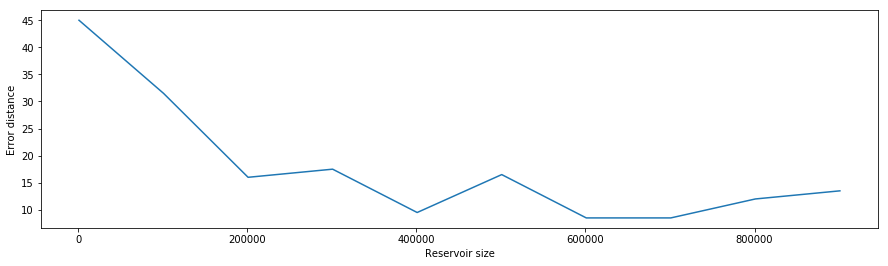

In [57]:
errors = []
for reservoir_size, reservoir in min_wise_reservoirs.items():
    error = calculate_distribution_error(reservoir, actual_distribution)
    errors.append(error)

plt.figure(figsize=(15,4))
plt.plot(min_wise_reservoir_sizes, errors)
plt.xlabel('Reservoir size')
plt.ylabel('Error distance')
plt.show()

In [95]:
class MinSketch:
    def __init__(self, width, depth):
        self.width = width
        self.depth = depth
        self.structure = np.zeros((depth, width))
    
    def add(self, element):
        for current_depth in range(self.depth):
            index = hash((element, current_depth)) % self.width
            self.structure[current_depth][index] += 1
    
    def query_count(self, element):
        counts = []
        for current_depth in range(self.depth):
            index = hash((element, current_depth)) % self.width
            counts.append(self.structure[current_depth][index])
        return min(counts)

### Baseline parameter initialization

In [104]:
depth_range = range(1, 100, 10) 

mws_sketch_search = {}
for d in depth_range:
    params = (int(800000 / d), d)
    
    # Fill baseline
    mws_baseline = MinSketch(*params)
    for idx, dst_ip in enumerate(scenario_data['dst_ip']):
        mws_baseline.add(dst_ip)

    # Compare baseline
    unique_ips = list(set(scenario_data['dst_ip']))
    mws_sketch_baseline_counts = []
    for ip in unique_ips:
        # Lookup ip from list of ips sketch
        ip_count = mws_baseline.query_count(ip)
        mws_sketch_baseline_counts.append(ip_count)

    indices_sampled = reversed(np.array(mws_sketch_baseline_counts).argsort()[-10:])
    mws_sketch_counter = []
    for idx in indices_sampled:
        mws_sketch_counter.append((unique_ips[idx], mws_sketch_baseline_counts[idx]))
    
    print('Did {}'.format(params))
    mws_sketch_search[params] = mws_sketch_counter

mws_sketch_search

Did (800000, 1)
Did (72727, 11)
Did (38095, 21)
Did (25806, 31)
Did (19512, 41)
Did (15686, 51)
Did (13114, 61)
Did (11267, 71)
Did (9876, 81)
Did (8791, 91)


{(800000, 1): [('78.141.179.10', 1935.0),
  ('58.106.91.86', 1935.0),
  ('149.5.45.70', 1736.0),
  ('144.177.50.6', 1308.0),
  ('212.25.39.131', 1259.0),
  ('78.141.181.221', 1259.0),
  ('94.73.40.128', 1242.0),
  ('208.88.186.8', 1242.0),
  ('89.202.144.42', 1228.0),
  ('78.141.179.8', 1216.0)],
 (72727, 11): [('78.141.179.10', 1945.0),
  ('149.5.45.70', 1737.0),
  ('144.177.50.6', 1311.0),
  ('78.141.181.221', 1261.0),
  ('89.202.144.42', 1255.0),
  ('79.17.73.206', 1255.0),
  ('208.88.186.8', 1245.0),
  ('78.141.179.8', 1219.0),
  ('196.27.98.8', 1207.0),
  ('208.88.186.9', 1175.0)],
 (38095, 21): [('78.141.179.10', 1940.0),
  ('149.5.45.70', 1748.0),
  ('144.177.50.6', 1314.0),
  ('78.141.181.221', 1269.0),
  ('78.141.179.8', 1257.0),
  ('81.90.234.125', 1257.0),
  ('46.10.98.174', 1249.0),
  ('89.202.144.42', 1249.0),
  ('208.88.186.8', 1245.0),
  ('196.27.98.8', 1206.0)],
 (25806, 31): [('78.141.179.10', 1963.0),
  ('149.5.45.70', 1763.0),
  ('89.229.101.208', 1763.0),
  ('144.17

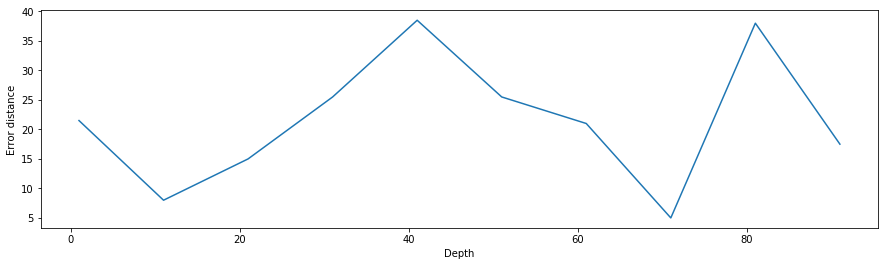

In [107]:
errors = []
ps = []
for sketch_params, s in mws_sketch_search.items():
    error = calculate_distribution_error(s, actual_distribution)
    errors.append(error)
    ps.append(sketch_params)

plt.figure(figsize=(15,4))
plt.plot(depth_range, errors)
plt.xlabel('Depth')
plt.ylabel('Error distance')
plt.show()

### Increasing the width

In [110]:
width_range = range(10000, 20000, 1000)

width_sketch_search = {}
for w in width_range:
    params = (w, 70) # Set depth to best from anaylysis above (70)
    
    # Fill baseline
    mws_baseline = MinSketch(*params)
    for idx, dst_ip in enumerate(scenario_data['dst_ip']):
        mws_baseline.add(dst_ip)

    # Compare baseline
    unique_ips = list(set(scenario_data['dst_ip']))
    mws_sketch_baseline_counts = []
    for ip in unique_ips:
        # Lookup ip from list of ips sketch
        ip_count = mws_baseline.query_count(ip)
        mws_sketch_baseline_counts.append(ip_count)

    indices_sampled = reversed(np.array(mws_sketch_baseline_counts).argsort()[-10:])
    mws_sketch_counter = []
    for idx in indices_sampled:
        mws_sketch_counter.append((unique_ips[idx], mws_sketch_baseline_counts[idx]))
    
    print('Did {}'.format(params))
    width_sketch_search[params] = mws_sketch_counter

width_sketch_search

Did (10000, 70)
Did (11000, 70)
Did (12000, 70)
Did (13000, 70)
Did (14000, 70)
Did (15000, 70)
Did (16000, 70)
Did (17000, 70)
Did (18000, 70)
Did (19000, 70)


{(10000, 70): [('58.106.91.86', 1995.0),
  ('91.199.199.17', 1995.0),
  ('94.26.23.154', 1995.0),
  ('78.141.179.10', 1995.0),
  ('149.5.45.70', 1820.0),
  ('87.119.109.133', 1429.0),
  ('144.177.50.6', 1429.0),
  ('46.175.64.5', 1429.0),
  ('59.97.2.135', 1429.0),
  ('109.226.112.196', 1429.0)],
 (11000, 70): [('78.141.179.10', 2006.0),
  ('118.93.237.191', 1839.0),
  ('212.10.16.66', 1839.0),
  ('149.5.45.70', 1839.0),
  ('92.81.94.230', 1839.0),
  ('82.77.36.50', 1839.0),
  ('69.85.119.247', 1839.0),
  ('203.78.122.59', 1390.0),
  ('144.177.50.6', 1390.0),
  ('77.85.18.194', 1336.0)],
 (12000, 70): [('46.152.166.147', 1986.0),
  ('91.199.199.17', 1986.0),
  ('219.89.109.61', 1986.0),
  ('80.184.40.149', 1986.0),
  ('78.141.179.10', 1986.0),
  ('86.27.253.183', 1986.0),
  ('94.26.23.154', 1986.0),
  ('58.106.91.86', 1986.0),
  ('151.82.122.17', 1986.0),
  ('118.93.237.191', 1825.0)],
 (13000, 70): [('94.26.23.154', 1976.0),
  ('78.141.179.10', 1976.0),
  ('149.5.45.70', 1792.0),
  ('

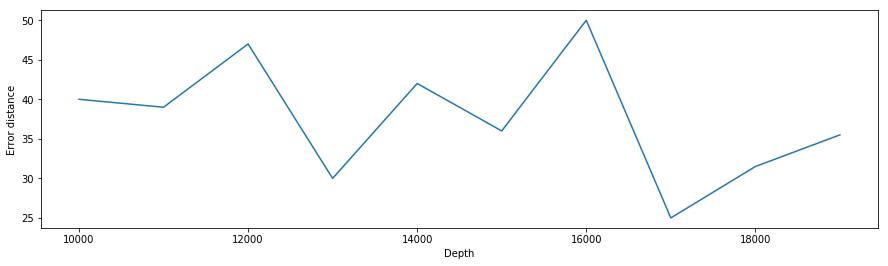

In [113]:
errors = []
ps = []
for sketch_params, s in width_sketch_search.items():
    error = calculate_distribution_error(s, actual_distribution)
    errors.append(error)
    ps.append(sketch_params)

plt.figure(figsize=(15,4))
plt.plot(width_range, errors)
plt.xlabel('Depth')
plt.ylabel('Error distance')
plt.show()